In [1]:
#Importing the dependencies
import math
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
import random

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#Importing the dataset

df = pd.read_csv('xclara.csv')
# Necessary for convert the DataFrame to Numpy Array
X = df.values
n_samples, n_features = X.shape
print('samples', n_samples, 'features', n_features)

samples 3000 features 2


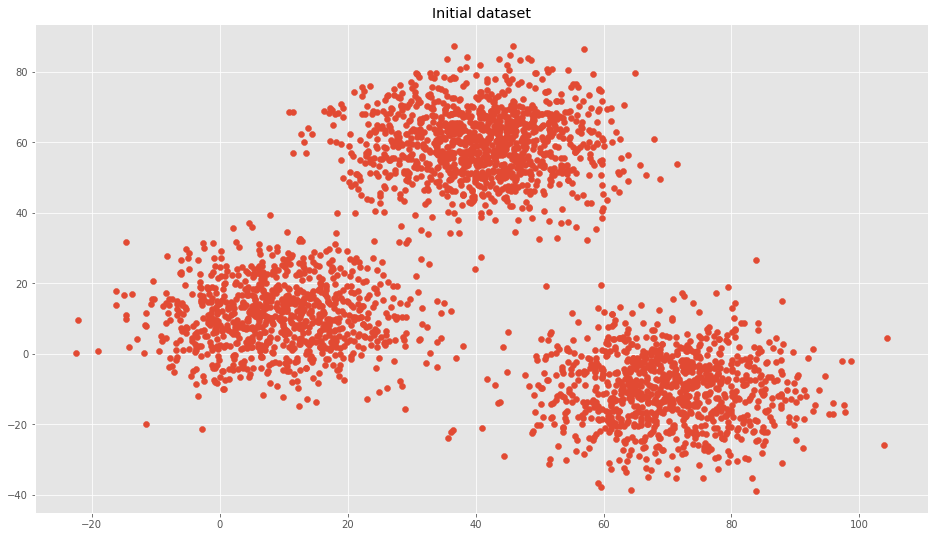

In [3]:
# Plot the inital data distribuition
plt.scatter(X[:, 0], X[:,1])
plt.title('Initial dataset')
plt.legend()
 
plt.show()

In [4]:
# Calculates the Euclidian Distance
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [5]:
### Kmeans ###
# @ K = number of clusters, default 3
# @ iterations = max number of iterations, default 300
# @ distance = type of distance metric, default euclidian
# @ init = initialization method, 'random', 'k-means++'
def kMeans(X, K, max_iterations=300, distance='euclidian', init='random'):

    num_instances, num_features = X.shape
    
    # Initialize the centroids
    # Pick k random points to use as our initial centroids
    centroids = X[np.random.randint(0, num_instances - 1, size=K)]
    print('initial', centroids)
    
    centroids_old = np.zeros(centroids.shape)
    
    clusters = np.zeros(num_instances)
    
    while (centroids_old != centroids).any():
        # make the new centroids the current
        centroids_old = centroids.copy()
        
        dist_matrix = distance_matrix(X, centroids, p=2)
        
        for i in np.arange(num_instances):
            # finding the closest centroid
            d = dist_matrix[i]
            closest_centroid = (np.where(d == np.min(d)))[0][0]
            
            # each datapoint is assigned to the closest centroid
            clusters[i] = closest_centroid
            
        # then recompute the centroids
        # for each centroid
        for c in np.arange(K):
            Xc = X[clusters == c]
            centroids[c] = np.apply_along_axis(np.mean, axis=0, arr=Xc)
                
    return centroids, clusters
        
    
    print('done')
    

kMeans(X, K=3)

(array([[ 69.92418447, -10.11964119],
        [ 40.68362784,  59.71589274],
        [  9.4780459 ,  10.686052  ]]),
 array([ 2.,  2.,  2., ...,  0.,  0.,  0.]))

In [99]:
# Scikit Implementation
kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# My kMeans implementation
centroids, clusters = kMeans(X, K=10)

# Comparing plots
plt.figure()
plt.subplot(221)
plt.title('Scikit Clusters')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')

plt.subplot(222)
plt.scatter(X[:, 0], X[:,1], s = 100, c = clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'red', label = 'Centroids')

plt.title('My Clusters')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: index 0 is out of bounds for axis 0 with size 0